In [1]:
# Used to load the dataset and for data pre-processing
import pandas as pd

# Used to do calculations with the data
import numpy as np

# Used for ploting during data exploration and result analysis. 
import matplotlib.pyplot as plt


In [2]:
# Data was taken from kaggle 
# If you want to use google colab use the following three lines of code. 
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('./drive/MyDrive/recidivism.csv')

data = pd.read_csv('./recidivism.csv')


Mounted at /content/drive


In [3]:
# Exploring the data by looking at the first 5 rows and shape. 
print(data.head())
print(data.shape)


   Fiscal Year Released  Recidivism Reporting Year      Race - Ethnicity  \
0                  2010                       2013  White - Non-Hispanic   
1                  2010                       2013  White - Non-Hispanic   
2                  2010                       2013  White - Non-Hispanic   
3                  2010                       2013  White - Non-Hispanic   
4                  2010                       2013  Black - Non-Hispanic   

  Age At Release  Convicting Offense Classification Convicting Offense Type  \
0        Under 25                          D Felony                 Violent   
1    55 and Older                          D Felony            Public Order   
2           25-34                          D Felony                Property   
3    55 and Older                          C Felony                    Drug   
4           25-34                          D Felony                    Drug   

  Convicting Offense Subtype Main Supervising District Release Type 

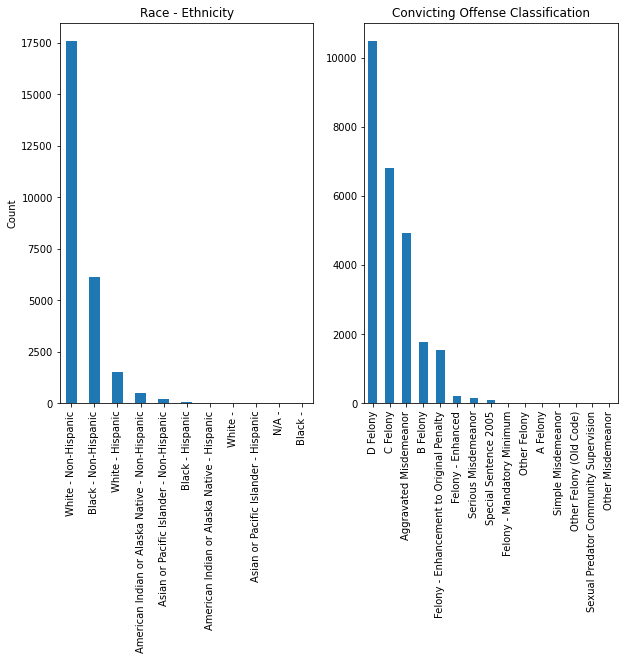

In [4]:
# Exploring the data to check the most common classes.

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data['Race - Ethnicity'].value_counts().plot(kind='bar')
plt.title("Race - Ethnicity")
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
data['Convicting Offense Classification'].value_counts().plot(kind='bar')
plt.title("Convicting Offense Classification")

plt.show()


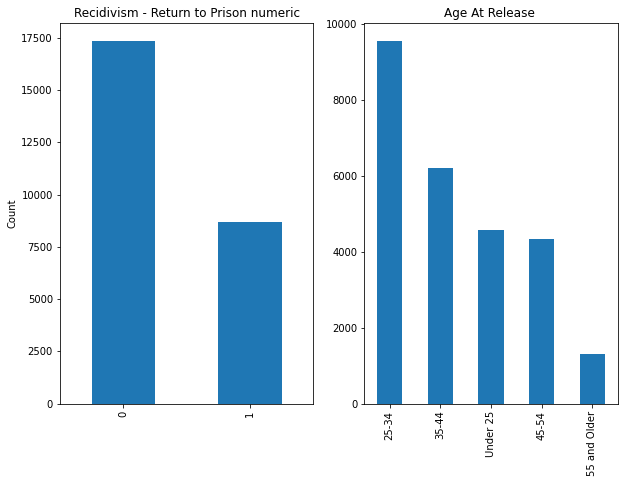

In [ ]:
# Exploring the data to check the most common classes.

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data['Recidivism - Return to Prison numeric'].value_counts().plot(kind='bar')
plt.title("Recidivism - Return to Prison numeric")
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
data['Age At Release '].value_counts().plot(kind='bar')
plt.title("Age At Release ")

plt.show()


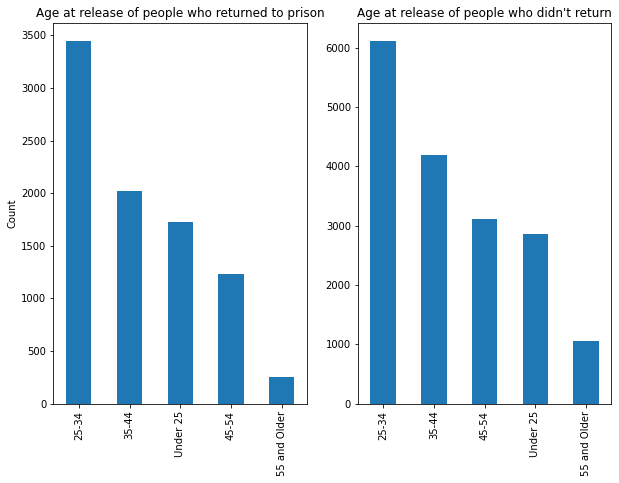

In [ ]:
# Exploring the data to check the most common classes.

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data.loc[data['Recidivism - Return to Prison numeric'] == 1]['Age At Release '].value_counts().plot(kind='bar')
plt.title("Age at release of people who returned to prison")
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
data.loc[data['Recidivism - Return to Prison numeric'] == 0]['Age At Release '].value_counts().plot(kind='bar')
plt.title("Age at release of people who didn't return")

plt.show()


In [5]:
# Getting a list of all columns
print("List of columns: ", data.columns)


List of columns:  Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype',
       'Main Supervising District', 'Release Type',
       'Release type: Paroled to Detainder united',
       'Part of Target Population', 'Recidivism - Return to Prison numeric'],
      dtype='object')


In [41]:
# Categorical data like Race, Age, Convicting offense, and release type are turned into columns. 
# For example a new column is created with a name of 25-34 and for every row where that is true, 
# the value of this column is 1. 

data_race = pd.get_dummies(data['Race - Ethnicity'])
placeholder_data = pd.concat([data, data_race], axis=1)

data_age = pd.get_dummies(placeholder_data['Age At Release '])
placeholder_data = pd.concat([placeholder_data, data_age], axis=1)

data_offese_clasification = pd.get_dummies(placeholder_data['Convicting Offense Classification'])
placeholder_data = pd.concat([placeholder_data, data_offese_clasification], axis=1)

data_release_type = pd.get_dummies(placeholder_data['Release Type'])
placeholder_data = pd.concat([placeholder_data, data_release_type], axis=1)

final_data = placeholder_data.drop(["Fiscal Year Released", "Recidivism Reporting Year", 
                                    "Race - Ethnicity", "Age At Release ", "Convicting Offense Classification", "Convicting Offense Type", 
                                    "Convicting Offense Subtype", "Release Type", "Release type: Paroled to Detainder united", "Main Supervising District", 
                                    "N/A -", "Part of Target Population"], axis = 1)
print(final_data.columns)


Index(['Recidivism - Return to Prison numeric',
       'American Indian or Alaska Native - Hispanic',
       'American Indian or Alaska Native - Non-Hispanic',
       'Asian or Pacific Islander - Hispanic',
       'Asian or Pacific Islander - Non-Hispanic', 'Black -',
       'Black - Hispanic', 'Black - Non-Hispanic', 'White -',
       'White - Hispanic', 'White - Non-Hispanic', '25-34', '35-44', '45-54',
       '55 and Older', 'Under 25', 'A Felony', 'Aggravated Misdemeanor',
       'B Felony', 'C Felony', 'D Felony', 'Felony - Enhanced',
       'Felony - Enhancement to Original Penalty',
       'Felony - Mandatory Minimum', 'Other Felony', 'Other Felony (Old Code)',
       'Other Misdemeanor', 'Serious Misdemeanor',
       'Sexual Predator Community Supervision', 'Simple Misdemeanor',
       'Special Sentence 2005', 'Discharged End of Sentence',
       'Interstate Compact Parole', 'Parole', 'Paroled to Detainer - INS',
       'Paroled to Detainer - Iowa', 'Paroled to Detainer - Out o

In [7]:
# Splitting the data into input, and predicted variable. 

X = final_data.drop(["Recidivism - Return to Prison numeric"], axis = 1)
y = final_data["Recidivism - Return to Prison numeric"]


## Splitting the data in training and testing

In [8]:
import random

# Spliting the data into 80% training, and 20% testing. 
# We choose random rows for testing and training. 

# Get the len of column
number_of_rows = len(y)

# Go through all rows
all_rows = range(0,number_of_rows)

# Set the percentage for train dat
percentage_train = 0.8

# select the training row and testing rows. 
train_len = round(number_of_rows * percentage_train)
training_rows = random.sample(all_rows, train_len)

testing_rows = []

for i in range(number_of_rows):
  if i not in training_rows:
    testing_rows.append(i)


In [9]:
# Spliting the data into train and test data. 
X_train = X.iloc[training_rows]
y_train = y.iloc[training_rows]
X_test = X.iloc[testing_rows]
y_test = y.iloc[testing_rows]

# Turning pandas df to numpy array. Numpy is really good at doing calculations quickly. 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [10]:
# Picking a smaller subset of the data so the training goes quicker. 

X_train2 = X_train[0:10000]
y_train2 = y_train[0:10000]

X_test2 = X_test[0:2000]
y_test2 = y_test[0:2000]


## Implementing KNN

KNN is a classification and regression algorithm. KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label which in our case is 1 or 0. 

In [11]:
# Find the most common response 
def most_common(vote_list):
    return max(set(vote_list), key=vote_list.count)

# Calculating the euclidian distance between the point and the data. 
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


class KNeighborsClassifier:

  # Initializing with k, and with the distance function
  def __init__(self, k=5, dist_metric=euclidean):
    self.k = k
    self.dist_metric = dist_metric
  

  # Fit the model using the training data
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    neighbors = []
    for x in X_test:
        distances = self.dist_metric(x, self.X_train)
        y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
        neighbors.append(y_sorted[:self.k])

    return list(map(most_common, neighbors))


  def evaluate(self, X_test, y_test):

    # Predict using X_test then compare the predicted value with the real value
    y_pred = self.predict(X_test)

    # Accuracy will be equal to the number of correct guesses divided by total guesses. 
    accuracy = sum(y_pred == y_test) / len(y_test)
    return accuracy



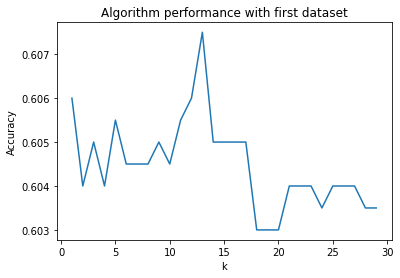

In [12]:

list_of_accuracies = []
ks = range(1, 30)

for k in ks:
  # Create a classifier for each k  
  knn = KNeighborsClassifier(k=k)

  # Fit the model using the training data. 
  knn.fit(X_train2, y_train2)

  #Test the moddel using the testing data, and get the accuracy 
  accuracy = knn.evaluate(X_test2, y_test2)

  # Append the accuracy to the list so we can later plot it. 
  list_of_accuracies.append(accuracy)

# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, list_of_accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Algorithm performance with first dataset")
plt.show()


# Confusion matrix

In [13]:

# Get the predictions from the model using test2 data
y_pred2 = knn.predict(X_test2)


In [14]:

# Create the confusion matrix. 

y_actu = pd.Series(y_test2, name='Actual')
y_pred = pd.Series(y_pred2, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)


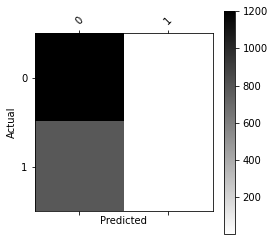

In [15]:

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    # imshow
    plt.matshow(df_confusion, cmap=cmap)\

    #plt.title(title)
    plt.colorbar()

    # Set tick marks
    tick_marks = np.arange(len(df_confusion.columns))

    # Set x and y ticks
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)


    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)


# Plotting the confusion matrix. 
df_confusion = pd.crosstab(y_actu, y_pred)
plot_confusion_matrix(df_confusion)


We get a accuracy of 63%. This is about 4% less than the state of the art algorithm when it comes to predicting recivisim. Scientific paper predicting recivisism: https://www.science.org/doi/10.1126/sciadv.aao5580

# Testing algorithm with a second recidivism dataset
This dataset is a little bit different, it includes the number of priors, as well as the sex of the offender. This data was not in the first dataset so let's see if we can get a higher accuracy using this dataset. 


In [68]:

#Uploading the new dataset from a github url. This is used for a lot of recidivism models. 

url="https://raw.githubusercontent.com/adebayoj/fairml/master/doc/example_notebooks/propublica_data_for_fairml.csv"
data2=pd.read_csv(url)


# Getting the data shape

In [69]:

# Printing the shape and the first 5 rows of the data. 

print(data2.head())
print(data2.shape)


   Two_yr_Recidivism  Number_of_Priors  score_factor  Age_Above_FourtyFive  \
0                  0                 0             0                     1   
1                  1                 0             0                     0   
2                  1                 4             0                     0   
3                  0                 0             0                     0   
4                  1                14             1                     0   

   Age_Below_TwentyFive  African_American  Asian  Hispanic  Native_American  \
0                     0                 0      0         0                0   
1                     0                 1      0         0                0   
2                     1                 1      0         0                0   
3                     0                 0      0         0                0   
4                     0                 0      0         0                0   

   Other  Female  Misdemeanor  
0      1       0        

# Checking if the data is balanced

It is important for us to explore the data more. 
Here we will see how many people were arrested and charged with misdemeanor, 
how many are female and male, age, and more. 

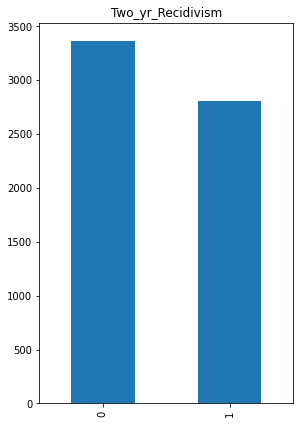

In [46]:

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2['Two_yr_Recidivism'].value_counts().plot(kind='bar')
plt.title("Two_yr_Recidivism")

plt.show()


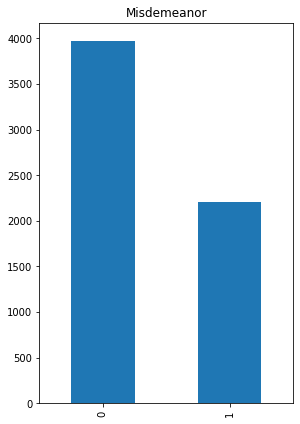

In [49]:

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2['Misdemeanor'].value_counts().plot(kind='bar')
plt.title("Misdemeanor")

plt.show()


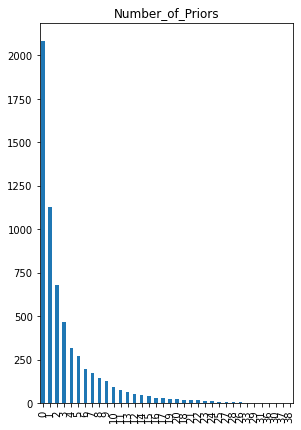

In [50]:

# Most people don't have any prioris and then we have some who
# have more than thirty priors. 

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2['Number_of_Priors'].value_counts().plot(kind='bar')
plt.title("Number_of_Priors")

plt.show()


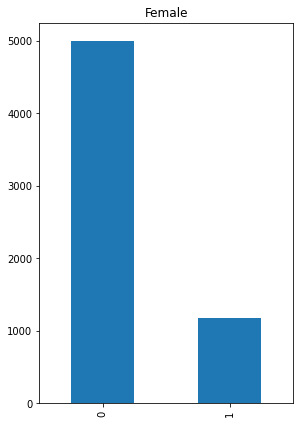

In [29]:

# The majority of inmates are males
# This is common in most countries. 


plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2['Female'].value_counts().plot(kind='bar')
plt.title("Female")

plt.show()


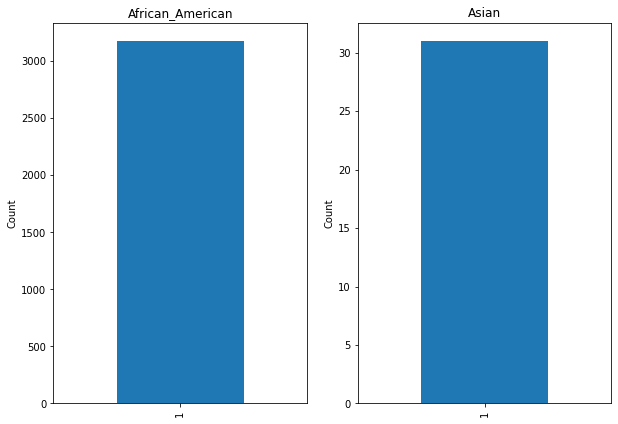

In [31]:

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2.loc[data2['African_American'] == 1]['African_American'].value_counts().plot(kind='bar')
plt.title("African_American")
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
data2.loc[data2['Asian'] == 1]['Asian'].value_counts().plot(kind='bar')
plt.title("Asian")
plt.ylabel('Count')

plt.show()


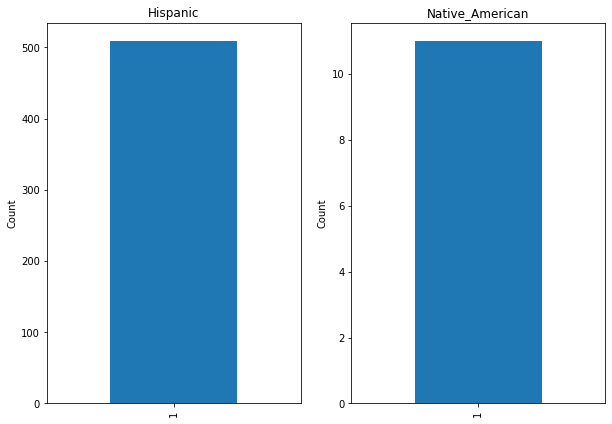

In [51]:

# The number of native american inmates is very low at under 15. 

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2.loc[data2['Hispanic'] == 1]['Hispanic'].value_counts().plot(kind='bar')
plt.title("Hispanic")
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
data2.loc[data2['Native_American'] == 1]['Native_American'].value_counts().plot(kind='bar')
plt.title("Native_American")
plt.ylabel('Count')

plt.show()


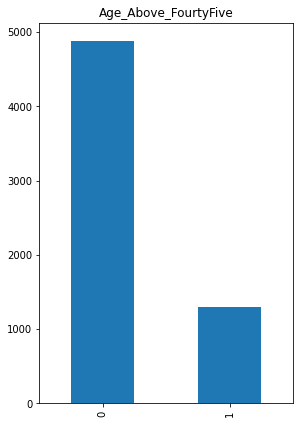

In [32]:

# The majority of people are under 45. 
# This makes sense when it comes to using it as a predictor 
# for recidivism. 

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
data2['Age_Above_FourtyFive'].value_counts().plot(kind='bar')
plt.title("Age_Above_FourtyFive")

plt.show()


In [70]:

# Split the data into input data and output data. 
# We use the data in the X df to predict y. 

X = data2.drop(["Two_yr_Recidivism"], axis = 1)
y = data2["Two_yr_Recidivism"]


In [71]:

import random

# Spliting the data into 80% training, and 20% testing. 
# We choose random rows for testing and training. 

# Get the len of column
number_of_rows = len(y)

# Go through all rows
all_rows = range(0,number_of_rows)

# Set the percentage for train dat
percentage_train = 0.8

# select the training row and testing rows. 
train_len = round(number_of_rows * percentage_train)
training_rows = random.sample(all_rows, train_len)

testing_rows = []

for i in range(number_of_rows):
  if i not in training_rows:
    testing_rows.append(i)


In [79]:

# Splitting the training and testing data. 
X_train = X.iloc[training_rows]
y_train = y.iloc[training_rows]
X_test = X.iloc[testing_rows]
y_test = y.iloc[testing_rows]

# Turning pandas df to numpy array. Numpy is really good at doing calculations quickly. 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


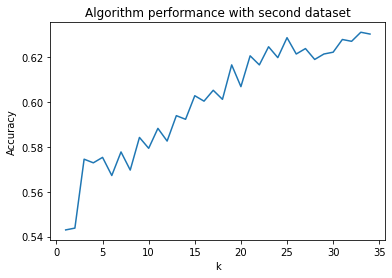

In [73]:

# Test knn model across varying ks
list_of_accuracies = []
ks = range(1, 35)
for k in ks:
  # Create a classifier for each k  
  knn = KNeighborsClassifier(k=k)

  # Fit the model using the training data. 
  knn.fit(X_train, y_train)

  #Test the moddel using the testing data, and get the accuracy 
  accuracy = knn.evaluate(X_test, y_test)

  # Append the accuracy to the list so we can later plot it. 
  list_of_accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, list_of_accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Algorithm performance with second dataset")
plt.show()


The algorithm with the newer data seems to perform better, close to 64%

In [78]:
# Predicting using the X_test data
y_pred = knn.predict(X_test)


In [81]:
# Building a confusion matrix. 

y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)


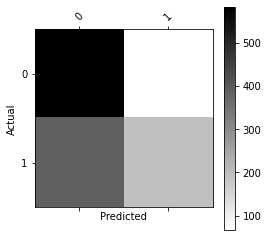

In [82]:
# Displaying the confusion matrix. 

df_confusion = pd.crosstab(y_actu, y_pred)
plot_confusion_matrix(df_confusion)


# Improvements

1. All the data from the first dataset should be used. Since there are over 20,000 rows, it takes a long time to train, that's we trained with a smaller dataset. Training with the full dataset could produce better results. 

2. K can be increased to improve the accuracy of the algorithm

3. The speed of the algorithm could be improved. The version of KNN that is used in the sklearn library, is much faster than the one that we have implemented.  

4. Different algorithms such as CNN could perform better than KNN, so it would be worth exploring it. 

5. There were articles suggesting that maybe we should include race in the algorithm in order to not show any bias. 

6. The second dataset is used by an algorithm called compas. This is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism) in the US. It has been shown that the algorithm is biased in favor of white defendants, and against black inmates, based on a 2 year follow up study (i.e who actually committed crimes or violent crimes after 2 years). The pattern of mistakes, as measured by precision/sensitivity is notable. This should be taken into account as part of our algorithm

In [ ]:
%%shell
jupyter nbconvert --to html /content/prisoner_recidivism.ipynb


[NbConvertApp] Converting notebook /content/prisoner_recidivism.ipynb to html
[NbConvertApp] Writing 460830 bytes to /content/prisoner_recidivism.html
